# Benchmarks

## Initialize

In [1]:
#library(Rmisc)
library(dtplyr)
library(tidyverse)
library(glue)
library(arrow)
library(patchwork)
library(data.table)
library("jsonlite")
library(ggthemes)

Warning message:
“package ‘dtplyr’ was built under R version 4.0.3”
Warning message:
“package ‘tidyverse’ was built under R version 4.0.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘tibble’ was built under R version 4.0.5”
Warning message:
“package ‘tidyr’ was built under R version 4.0.3”
Warning message:
“package ‘readr’ was built under R version 4.0.5”
Warning message:
“package ‘purrr’ was built under R version 4.0.3”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”
Warning message:
“package ‘stringr’ was built under R version 4.0.5”
Warning message:
“package ‘forcats’ was built under R version 4.0.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::f

In [2]:
if (grepl("sc", Sys.info()[["nodename"]], fixed=TRUE)) {
    base_path = "/sc-projects/sc-proj-ukb-cvd"
} else {
    base_path = "/data/analysis/ag-reils/ag-reils-shared/cardioRS"}
print(base_path)

project_label = "22_retina_phewas_220603_fullrun"
project_path = glue("{base_path}/results/projects/{project_label}")
figure_path = glue("{project_path}/figures")
output_path = glue("{project_path}/data")

experiment = '220603_fullrun'
experiment_path = glue("{output_path}/{experiment}")

[1] "/sc-projects/sc-proj-ukb-cvd"


In [3]:
base_size = 8
title_size = 10
facet_size = 10
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2), panel.grid.major=element_line()))

In [4]:
colors_dict = read_json("colors.json")
color_map <- c(
    "Identity(AgeSex)+MLP" = colors_dict$pastel$red$mid,
    "Identity(Records)+MLP" = colors_dict$pastel$red$mid,
    "GNN(Records)+MLP" = colors_dict$pastel$red$mid,
    "Identity(AgeSex+Records)+MLP" = colors_dict$pastel$red$mid,
    "GNN(AgeSex+Records)+MLP" = colors_dict$pastel$red$mid
)

In [5]:
endpoint_defs = arrow::read_feather(glue("{output_path}/phecode_defs_220306.feather")) %>% arrange(endpoint)

In [6]:
endpoint_map = endpoint_defs$phecode_string
names(endpoint_map) =  endpoint_defs$endpoint
#endpoint_order_freq = (outcome_freq %>% arrange(desc(freq)))$endpoint

In [7]:
endpoint_order = (endpoint_defs %>% arrange(as.numeric(phecode)))$endpoint

In [8]:
endpoint_selection = c(
'phecode_164',
'phecode_179',
'phecode_202-2',
'phecode_284',
'phecode_401',
'phecode_404-1',
'phecode_413-21',
'phecode_413-32',
'phecode_416-21',
'phecode_420',
'phecode_424',
'phecode_431-1',
'phecode_438-6',
'phecode_440-3',
'phecode_444-13',
'phecode_448',
'phecode_468',
'phecode_474',
'phecode_542-4',
'phecode_583',
'phecode_665-1',
'phecode_705-1',
'phecode_718',
'OMOP_4306655'
    )

## Load data

# Load Benchmarks

In [15]:
name = "hrs_endpoints"
hrs_endpoints = arrow::read_feather(glue("{experiment_path}/{name}.feather"), col_select=c("endpoint", "score", "partition", "hrs_ret", "hrs_ret_age", "hrs_ret_sex")) %>% left_join(endpoint_defs) 

Joining, by = "endpoint"



In [16]:
hrs_endpoints

endpoint,score,partition,hrs_ret,hrs_ret_age,hrs_ret_sex,phecode,phecode_string,phecode_category,sex,ICD10_only,phecode_top,leaf
<glue>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
OMOP_4306655,ASCVD+Retina,ImageTraini,1.841906,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,ASCVD+Retina,ImageTraini,2.305291,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,ASCVD+Retina,ImageTraini,2.619298,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,ASCVD+Retina,ImageTraini,2.247894,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,ASCVD+Retina,ImageTraini,3.231338,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,ASCVD+Retina,ImageTraini,3.481284,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,ASCVD+Retina,ImageTraini,2.348453,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,ASCVD+Retina,ImageTraini,3.662349,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,ASCVD+Retina,ImageTraini,4.049142,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA


In [18]:
hrs = hrs_endpoints %>% 
    group_by(endpoint, score, phecode_string, phecode_category) %>% 
    #filter(score %in% c("Retina", "Age+Sex+Retina", "Age+Sex+Retina+I(Age*ret)")) %>%
    #mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    #mutate(phecode_category = factor(phecode_category, levels=pcats_sorted)) %>%
    select(endpoint, score, hrs_ret, hrs_ret_age, hrs_ret_sex, phecode_string, phecode_category) %>%
    ungroup()
hrs

endpoint,score,hrs_ret,hrs_ret_age,hrs_ret_sex,phecode_string,phecode_category
<glue>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
OMOP_4306655,ASCVD+Retina,1.841906,NA,NA,All-Cause Death,Death
OMOP_4306655,ASCVD+Retina,2.305291,NA,NA,All-Cause Death,Death
OMOP_4306655,ASCVD+Retina,2.619298,NA,NA,All-Cause Death,Death
OMOP_4306655,ASCVD+Retina,2.247894,NA,NA,All-Cause Death,Death
OMOP_4306655,ASCVD+Retina,3.231338,NA,NA,All-Cause Death,Death
OMOP_4306655,ASCVD+Retina,3.481284,NA,NA,All-Cause Death,Death
OMOP_4306655,ASCVD+Retina,2.348453,NA,NA,All-Cause Death,Death
OMOP_4306655,ASCVD+Retina,3.662349,NA,NA,All-Cause Death,Death
OMOP_4306655,ASCVD+Retina,4.049142,NA,NA,All-Cause Death,Death


In [19]:
unique(hrs$score)

[1] "ASCVD+Retina"   "Age+Sex+Retina" "QRISK3+Retina"  "Retina"        
[5] "SCORE2+Retina"

In [20]:
purrr::map_dfr(integer(100), ~ hrs %>% group_by(endpoint, score) %>% sample_frac(1, replace=TRUE), .id="i") -> temp_hrs

In [21]:
library(ggdist)

Warning message:
“package ‘ggdist’ was built under R version 4.0.5”


In [22]:
temp_hrs_ret = temp_hrs %>% group_by(endpoint, score, phecode_string, phecode_category) %>% median_qi(hrs_ret, hrs_ret_age, hrs_ret_sex, na.rm=TRUE)

In [23]:
temp_hrs_linear = temp_hrs %>% ungroup() %>%
    filter(score %in% c("Retina", "Age+Sex+Retina", "SCORE2+Retina", "ASCVD+Retina","QRISK3+Retina")) %>%
    group_by(endpoint, score, phecode_string, phecode_category) %>% 
    median_qi(`hrs_ret`, na.rm=TRUE) %>% rename(hr = `hrs_ret`) %>%
    mutate(hr = round(hr, 2), .lower=round(.lower, 2), .upper=round(.upper, 2)) %>%#c(hr, .lower, .upper), round, 1) %>%
    mutate(HR_Retina = glue("{hr} ({.lower}, {.upper})")) %>% 
    select(endpoint, score, phecode_string, phecode_category, HR_Retina) %>%
    pivot_wider(names_from="score", values_from="HR_Retina") %>% 
    select(all_of(c("phecode_category", "endpoint", "phecode_string", "Retina", 'Age+Sex+Retina',  "SCORE2+Retina", "ASCVD+Retina","QRISK3+Retina"))) %>% 
    mutate(endpoint = factor(endpoint, levels = endpoint_order)) %>% 
    arrange(endpoint) %>%
    #mutate(endpoint = recode(endpoint, !!!endpoint_map)) %>%
    ungroup()
    
temp_hrs_linear

phecode_category,endpoint,phecode_string,Retina,Age+Sex+Retina,SCORE2+Retina,ASCVD+Retina,QRISK3+Retina
<chr>,<fct>,<chr>,<glue>,<glue>,<glue>,<glue>,<glue>
ID,phecode_002,Staphylococcus,"3.26 (2.54, 3.86)","3.2 (2.4, 3.88)","2.99 (2.17, 3.65)","3.46 (2.47, 4.37)","3.14 (1.97, 4.23)"
ID,phecode_002-1,Staphylococcus aureus,"3.9 (2.52, 5.65)","6.83 (3.62, 10.62)","6.06 (3.2, 9.56)","6.37 (3.11, 10.23)","5.73 (2.72, 9.68)"
ID,phecode_003,Escherichia coli,"3.15 (2.45, 4.08)","3.56 (1.99, 5.49)","3.35 (1.83, 5.16)","3.41 (1.74, 5.75)","2.98 (1.58, 5.03)"
ID,phecode_004,Streptococcus,"138.68 (59.96, 408.82)","123.96 (45.09, 492.99)","98.93 (27.15, 291.72)","122.7 (40.43, 787.34)","80.45 (1.05, 422.07)"
ID,phecode_005,Mycobacteria,"3.35 (2.8, 3.95)","4.49 (3.82, 5.14)","4.48 (3.83, 5.14)","3.33 (2.26, 4.18)","3.48 (2.3, 4.48)"
ID,phecode_007,Hemophilus infection,"16.04 (4.36, 50.31)","11.81 (1.41, 40.74)","8.95 (0.93, 29.47)","126.21 (7.45, 578.42)","100.73 (5.08, 755.87)"
ID,phecode_007-1,Hemophilus influenzae,"62.64 (19.23, 159.88)","33.22 (3.04, 82.13)","22.9 (1.35, 49.45)","61.78 (3.16, 237.82)","49.58 (4.12, 165.31)"
ID,phecode_008,Helicobacter [H. pylori],"1.02 (0.94, 1.08)","0.82 (0.62, 1)","0.78 (0.61, 0.92)","1.02 (0.9, 1.17)","1 (0.89, 1.16)"
ID,phecode_009,Pseudomonas,"184.1 (90.96, 688.99)","173.92 (62.46, 774.07)","139.24 (46.74, 594.26)","673.78 (70.71, 5755.87)","322.73 (39.44, 2600.73)"


In [24]:
# new, after bugfix
temp_hrs_linear %>% filter(endpoint %in% endpoint_selection) %>% select(-phecode_category)

endpoint,phecode_string,Retina,Age+Sex+Retina,SCORE2+Retina,ASCVD+Retina,QRISK3+Retina
<fct>,<chr>,<glue>,<glue>,<glue>,<glue>,<glue>
phecode_164,Anemia,"11.99 (8.61, 17.06)","14.37 (7.63, 27.16)","11.92 (6.19, 21.65)","10.58 (4.54, 19.22)","9.04 (4.05, 16.44)"
phecode_179,Immunodeficiencies,"1.92 (1.37, 2.5)","2.07 (1.45, 2.76)","1.96 (1.36, 2.62)","2.27 (1.5, 3.23)","1.71 (1.17, 2.39)"
phecode_202-2,Type 2 diabetes,"2.21 (2.01, 2.64)","2.78 (2.36, 4.12)","2.52 (2.22, 3.44)","1.98 (1.76, 2.62)","1.74 (1.58, 2.08)"
phecode_284,Suicide ideation and attempt or self harm,"0.73 (0.54, 0.87)","4.01 (2.33, 6.35)","3.36 (1.95, 5.35)","2.97 (1.75, 4.61)","2.04 (1.33, 3.08)"
phecode_401,Hypertension,"5.29 (3.57, 9.79)","4.26 (2.88, 6.6)","3.38 (2.4, 4.62)","2.78 (1.85, 3.8)","2.5 (1.7, 3.29)"
phecode_404-1,Myocardial infarction [Heart attack],"0.28 (0.06, 0.73)","4.07 (2.31, 6.33)","3.48 (2.12, 5.42)","3.13 (1.82, 4.94)","2.63 (1.67, 4.15)"
phecode_413-21,Aortic stenosis,"5.66 (4.54, 6.77)","3.64 (2.16, 4.55)","3.31 (2.01, 4.18)","2.86 (1.74, 3.53)","2.54 (1.55, 3.11)"
phecode_413-32,Tricuspid value insufficiency*,"16.04 (10.52, 25.6)","10.79 (4.78, 19.05)","10.36 (4.27, 18.65)","10.21 (3.95, 19.41)","8.72 (3.31, 17.8)"
phecode_416-21,Atrial fibrillation,"3.39 (3.01, 3.84)","2.18 (1.52, 2.55)","2.02 (1.47, 2.45)","2.06 (1.48, 2.42)","1.89 (1.38, 2.23)"


## Interactions

In [25]:
temp_int_age = temp_hrs %>% ungroup() %>%
    filter(score %in% c("Age+Sex+Retina+I(Age*ret)")) %>%
    pivot_longer(all_of(c("hrs_ret", "hrs_ret_age", "hrs_ret_sex")), names_to="variable", values_to="hr") %>%
    filter(variable == "hrs_ret_age")

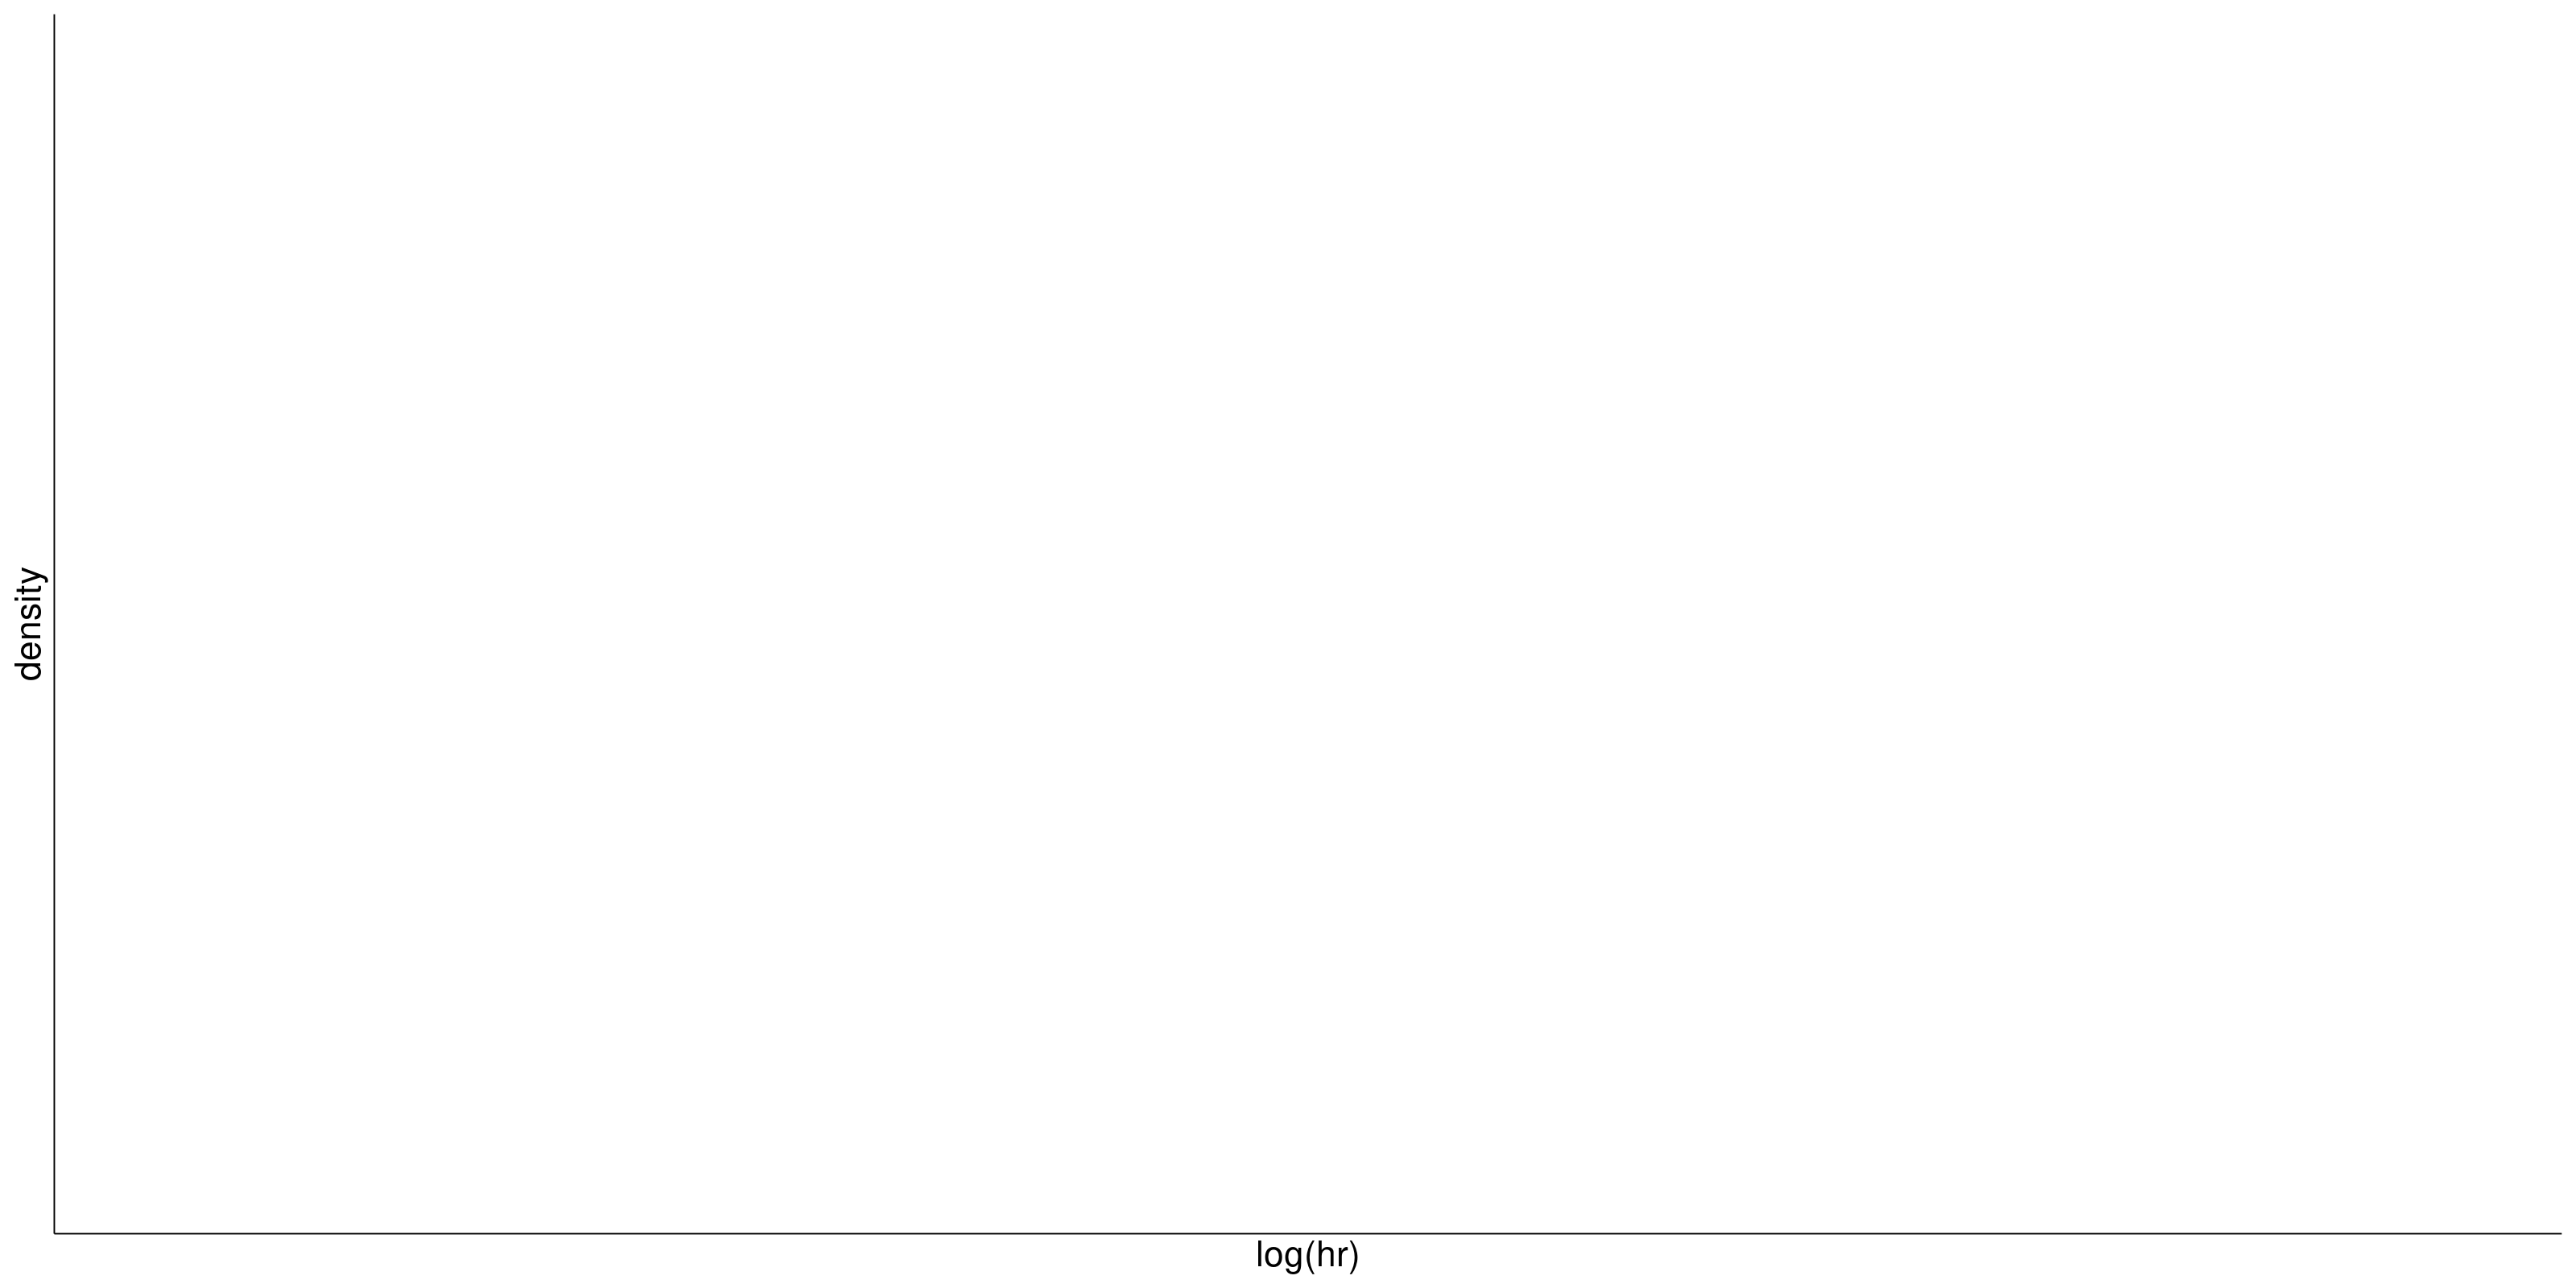

In [26]:
plot_width = 10; plot_height=5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

ggplot(temp_int_age, aes(x=log(hr))) + geom_density(fill="black", alpha=0.3)

In [27]:
temp_int_sex= temp_hrs %>% ungroup() %>%
    filter(score %in% c("Age+Sex+Retina+I(Age*ret)")) %>%
    pivot_longer(all_of(c("hrs_ret", "hrs_ret_age", "hrs_ret_sex")), names_to="variable", values_to="hr") %>%
    filter(variable == "hrs_ret_sex")

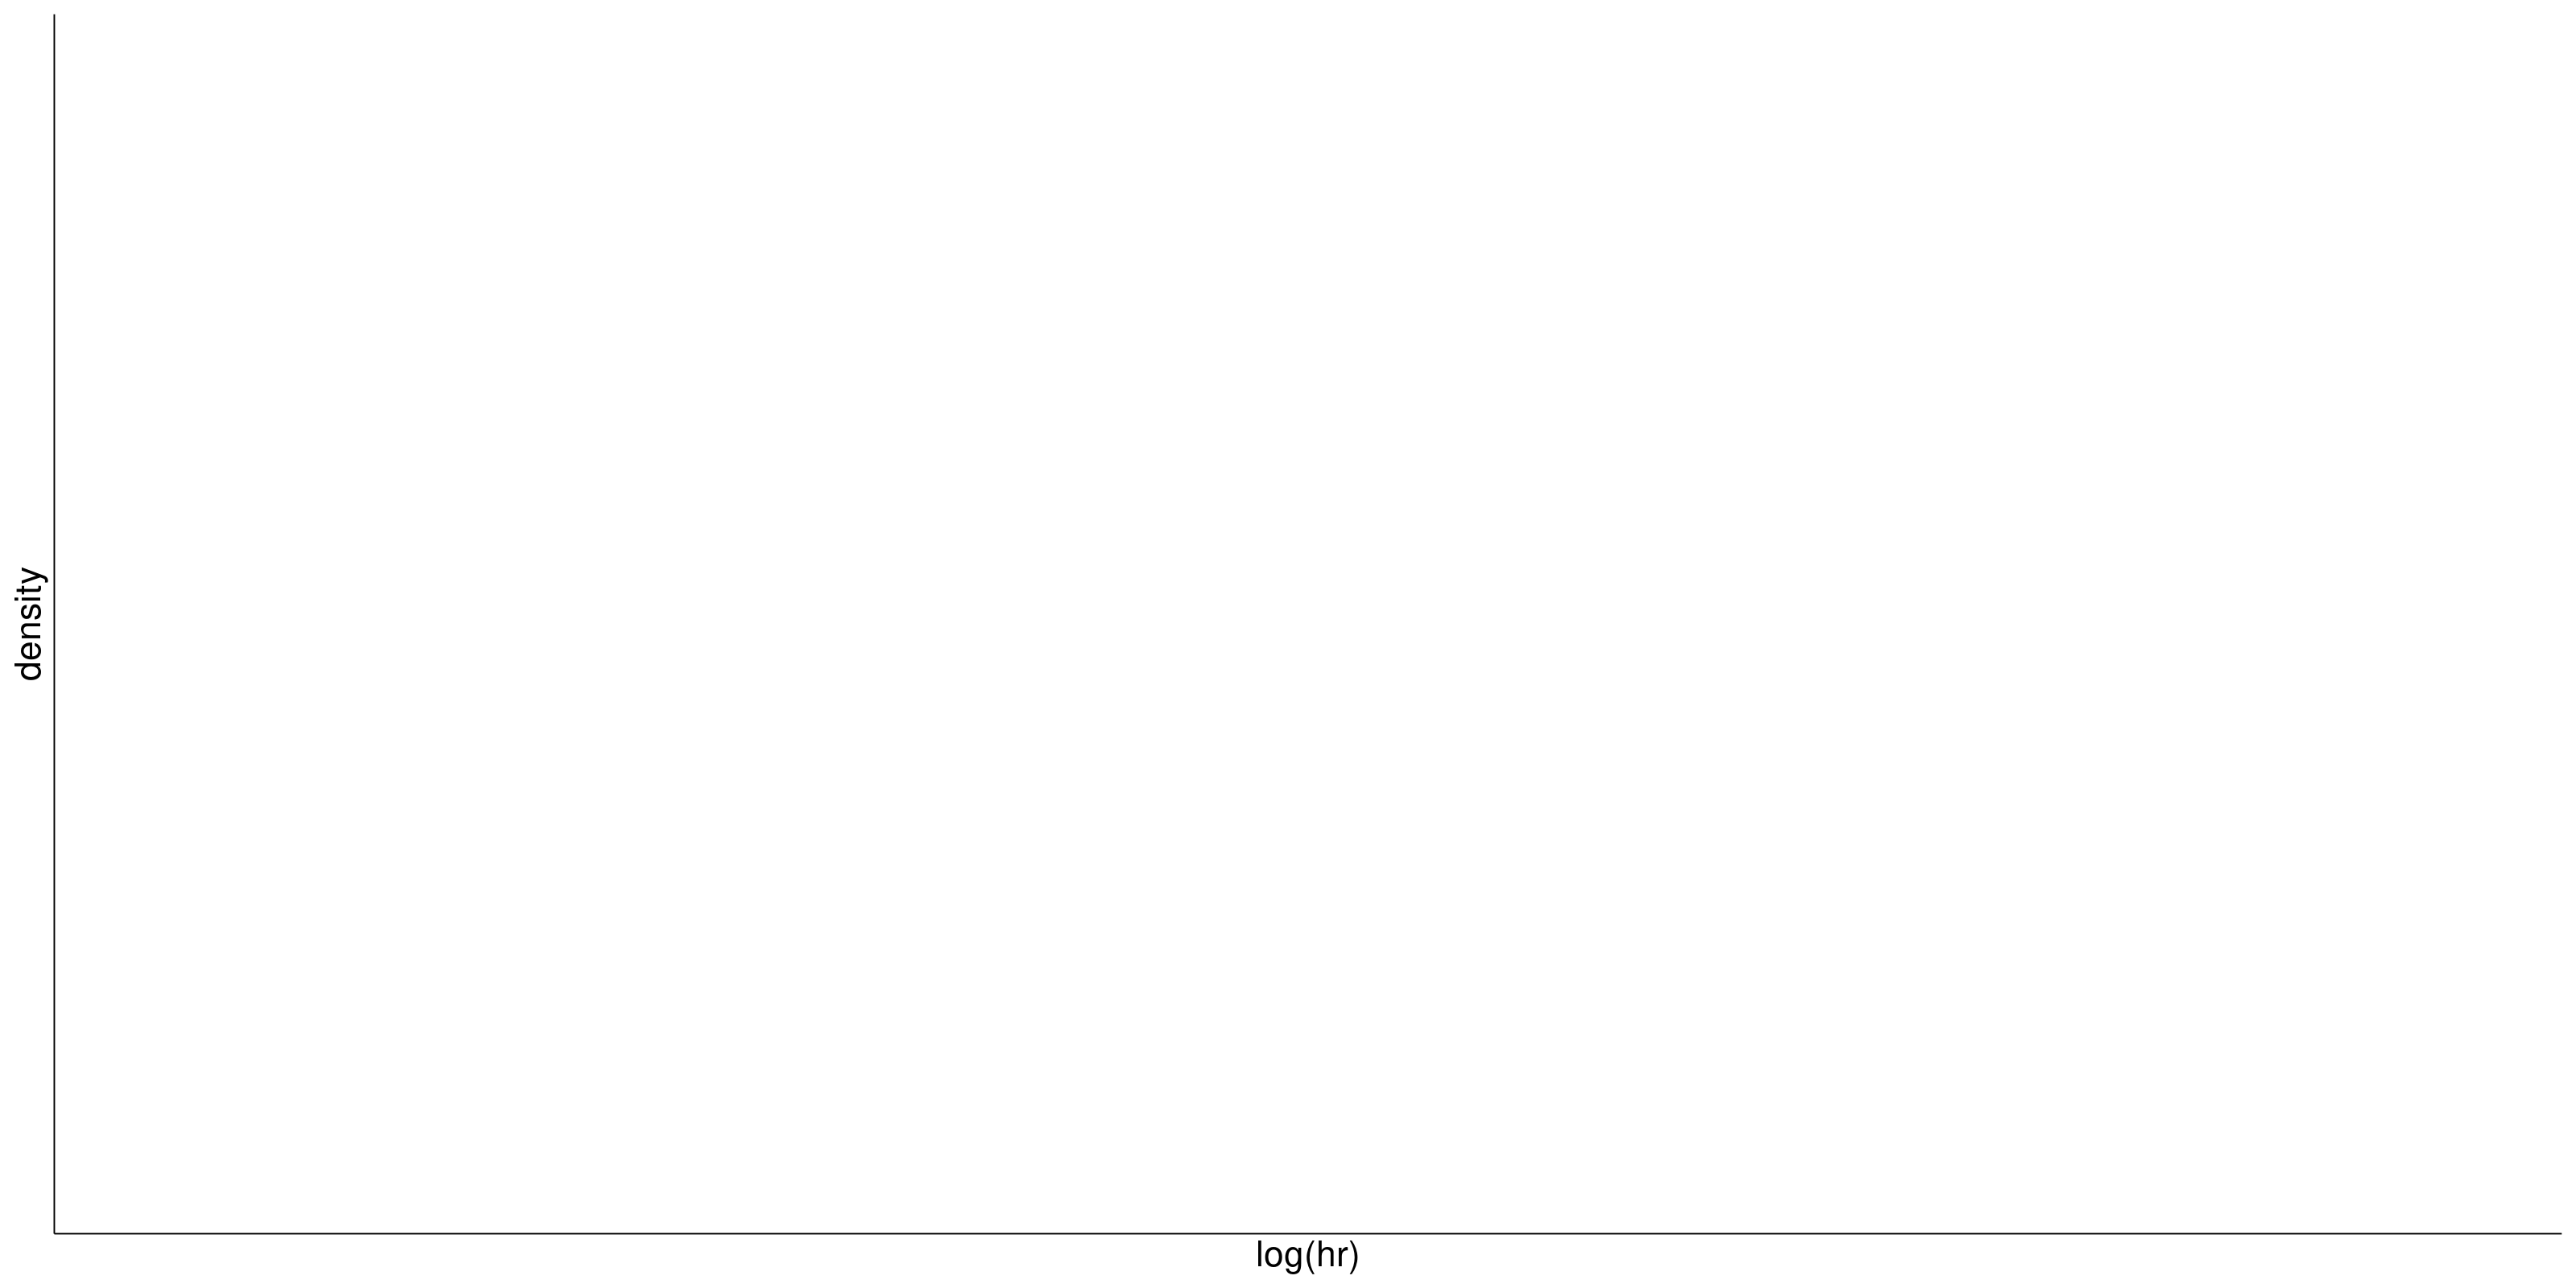

In [28]:
plot_width = 10; plot_height=5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

ggplot(temp_int_sex, aes(x=log(hr))) + geom_density(fill="black", alpha=0.3)

In [29]:
temp_hrs_int = temp_hrs %>% 
    filter(score %in% c("Age+Sex+Retina+I(Age*ret)")) %>%
    pivot_longer(all_of(c("hrs_ret", "hrs_ret_age", "hrs_ret_sex")), names_to="variable", values_to="hr") %>%
    group_by(endpoint, score, variable, phecode_string, phecode_category) %>% 
    median_qi(hr, na.rm=TRUE) %>% 
    mutate(hr = round(hr, 2), .lower=round(.lower, 2), .upper=round(.upper, 2)) %>%#c(hr, .lower, .upper), round, 1) %>%
    mutate(HR_label = glue("{hr} ({.lower}, {.upper})")) %>% 
    select(endpoint, variable, phecode_string, phecode_category, HR_label) %>%
    pivot_wider(names_from="variable", values_from="HR_label") %>% 
    select(all_of(c("phecode_category", "endpoint", "phecode_string", "hrs_ret", "hrs_ret_age", "hrs_ret_sex"))) %>% 
    mutate(endpoint = factor(endpoint, levels = endpoint_order)) %>% 
    arrange(endpoint) %>%
#mutate(endpoint = recode(endpoint, !!!endpoint_map)) %>%
    ungroup() %>%
    rename(HR_Retina = hrs_ret, `HR_Retina*Age`=hrs_ret_age, `HR_Retina*Sex`=hrs_ret_sex)
    
temp_hrs_int

ERROR: Error: Problem with `mutate()` column `hr`.
[34mℹ[39m `hr = round(hr, 2)`.
[31m✖[39m object 'hr' not found


In [78]:
temp_hrs_int %>% filter(endpoint %in% endpoint_selection) %>% select(-phecode_category) %>% 

endpoint,phecode_string,HR_MedHist,HR_MedHist*Age,HR_MedHist*Sex
<fct>,<chr>,<glue>,<glue>,<glue>
phecode_008,Helicobacter [H. pylori],"4.29 (3.94, 4.96)","0.99 (0.97, 1.01)","1.1 (1.06, 1.16)"
phecode_092-2,Sepsis,"4.05 (3.72, 4.4)","1 (0.98, 1.02)","1.02 (0.98, 1.1)"
phecode_105,Malignant neoplasm of the breast,"4.92 (4.42, 5.28)","0.95 (0.93, 0.98)","0.48 (0.36, 0.66)"
phecode_107-2,Malignant neoplasm of the prostate,"3.21 (2.7, 3.74)","0.54 (0.5, 0.58)","NA (NA, NA)"
phecode_164,Anemia,"3.93 (3.76, 4.21)","1 (0.98, 1.02)","0.97 (0.94, 1.03)"
phecode_202-2,Type 2 diabetes,"4.93 (4.76, 5.36)","0.9 (0.89, 0.93)","0.99 (0.94, 1.06)"
phecode_284,Suicide ideation and attempt or self harm,"3.42 (1.24, 3.74)","1.04 (0.08, 1.06)","1 (0.96, 1.65)"
phecode_328,Dementias and cerebral degeneration,"2.71 (2.61, 2.85)","0.86 (0.84, 0.89)","1.03 (1, 1.07)"
phecode_371,Cataract,"3.37 (3.27, 3.51)","0.92 (0.91, 0.94)","1.1 (1.07, 1.12)"


In [79]:
temp_hrs_int %>% arrange(`HR_Retina*Age`)

phecode_category,endpoint,phecode_string,HR_MedHist,HR_MedHist*Age,HR_MedHist*Sex
<chr>,<fct>,<chr>,<glue>,<glue>,<glue>
Rx,phecode_977-51,Long term (current) use of hormonal contraceptives,"1.07 (0.28, 10.04)","0.06 (0, 1.24)","NA (NA, NA)"
Mental,phecode_286-3,Premenstrual dysphoric disorder,"0.75 (0.32, 10.83)","0.08 (0.01, 1.21)","NA (NA, NA)"
Preg,phecode_900-1,Spontaneous abortion,"1.89 (1.55, 3.38)","0.51 (0.46, 0.68)","NA (NA, NA)"
Neoplasms,phecode_107-2,Malignant neoplasm of the prostate,"3.21 (2.7, 3.74)","0.54 (0.5, 0.58)","NA (NA, NA)"
Neoplasms,phecode_107,Malignant neoplasm of male genitalia,"2.84 (2.49, 3.2)","0.59 (0.55, 0.62)","NA (NA, NA)"
Genitourinary,phecode_600,Benign prostatic hyperplasia,"4.69 (4.26, 5.1)","0.61 (0.59, 0.63)","NA (NA, NA)"
Genitourinary,phecode_609,Male infertility,"6.31 (0.39, 12.33)","0.64 (0.01, 0.8)","NA (NA, NA)"
Musc/Skel,phecode_712-1,Loose body in joint,"15.34 (9.38, 25.12)","0.64 (0.57, 0.73)","1.2 (0.84, 1.33)"
Genitourinary,phecode_619-2,"Disorders of uterus, NEC","4.71 (4.08, 6.71)","0.68 (0.63, 0.72)","NA (NA, NA)"


In [ ]:
ggplot()

In [41]:
temp_hrs_agg  %>% 
    write_csv("outputs/SupplTable2_HRsAll.csv")

In [ ]:
select(all_of(c("phecode_category", "endpoint", "phecode_string", "Retina", 'Age+Sex+Retina'))) %>% 
    mutate(endpoint = factor(endpoint, levels = endpoint_order)) %>% 
    arrange(phecode_category, endpoint) %>%
%>% filter(endpoint %in% endpoint_selection)

In [ ]:
temp_hrs_agg

In [34]:
temp_hrs_agg = temp_hrs %>% filter(endpoint %in% ep_sel) %>%
    group_by(endpoint, features) %>% median_qi(`exp(coef)`, na.rm=TRUE) %>% rename(hr = `exp(coef)`) %>%
    mutate(hr = round(hr, 2), .lower=round(.lower, 2), .upper=round(.upper, 2)) %>%#c(hr, .lower, .upper), round, 1) %>%
    mutate(HR_Retina = glue("{hr} ({.lower}, {.upper})")) %>% 
    select(endpoint, features, HR_Retina) %>%
    pivot_wider(names_from="features", values_from="HR_Retina") %>% 
    select(all_of(c("endpoint", 'Age+Sex+Retina', 
                    #'SCORE2+Retina', 
                    'ASCVD+Retina', 
                   "PANEL+Retina"))) %>% 
    mutate(endpoint = factor(endpoint, levels = endpoint_order)) %>% arrange(endpoint) %>%
    mutate(endpoint = recode(endpoint, !!!endpoint_map)) %>%
    ungroup()
temp_hrs_agg

endpoint,Age+Sex+Metabolomics,ASCVD+Metabolomics,PANEL+Metabolomics
<fct>,<glue>,<glue>,<glue>
MACE,"1.63 (1.6, 1.65)","1.46 (1.43, 1.49)","1.37 (1.35, 1.4)"
CHD,"1.59 (1.58, 1.65)","1.44 (1.43, 1.48)","1.32 (1.3, 1.33)"
Cerebral Stroke,"1.72 (1.68, 1.76)","1.58 (1.54, 1.61)","1.55 (1.51, 1.59)"
Dementia,"1.56 (1.54, 1.72)","1.5 (1.48, 1.67)","1.46 (1.43, 1.58)"
Heart Failure,"1.8 (1.78, 1.87)","1.68 (1.65, 1.73)","1.43 (1.41, 1.47)"
Atrial Fibrillation,"1.48 (1.46, 1.53)","1.39 (1.37, 1.43)","1.24 (1.21, 1.25)"
T2 Diabetes,"3.83 (3.71, 4.01)","3.75 (3.64, 4.04)","2.5 (2.34, 2.67)"
Liver Disease,"1.72 (1.7, 1.81)","1.66 (1.64, 1.74)","1.44 (1.4, 1.47)"
Renal Disease,"1.71 (1.67, 1.74)","1.62 (1.6, 1.65)","1.34 (1.32, 1.36)"


In [35]:
fts_map = c(
    "Retina" = "MET",
    "COX_Age+Sex" = "AgeSex",
    "Age+Sex+Retina" = "AgeSex+MET",
    "COX_ASCVD" = "ASCVD",
    "ASCVD+Retina" = "ASCVD+MET",
    "COX_PANEL" = "PANEL", 
    "PANEL+Retina" = "PANEL+MET"
               )

In [36]:
hr_labels = temp_hrs_agg %>% 
    pivot_longer(-endpoint, names_to="features", values_to="HR")
hr_labels

endpoint,features,HR
<fct>,<chr>,<glue>
MACE,Age+Sex+Metabolomics,"1.63 (1.6, 1.65)"
MACE,ASCVD+Metabolomics,"1.46 (1.43, 1.49)"
MACE,PANEL+Metabolomics,"1.37 (1.35, 1.4)"
CHD,Age+Sex+Metabolomics,"1.59 (1.58, 1.65)"
CHD,ASCVD+Metabolomics,"1.44 (1.43, 1.48)"
CHD,PANEL+Metabolomics,"1.32 (1.3, 1.33)"
Cerebral Stroke,Age+Sex+Metabolomics,"1.72 (1.68, 1.76)"
Cerebral Stroke,ASCVD+Metabolomics,"1.58 (1.54, 1.61)"
Cerebral Stroke,PANEL+Metabolomics,"1.55 (1.51, 1.59)"


In [63]:
temp_hr

endpoint,score,phecode_string,phecode_category,hr
<glue>,<chr>,<chr>,<chr>,<dbl>
OMOP_4306655,Age+Sex+MedicalHistory,All-Cause Death,Death,2.207289
phecode_001,Age+Sex+MedicalHistory,Salmonella,ID,8.157043
phecode_002,Age+Sex+MedicalHistory,Staphylococcus,ID,1.986996
phecode_002-1,Age+Sex+MedicalHistory,Staphylococcus aureus,ID,2.159156
phecode_003,Age+Sex+MedicalHistory,Escherichia coli,ID,1.941919
phecode_004,Age+Sex+MedicalHistory,Streptococcus,ID,3.087620
phecode_004-1,Age+Sex+MedicalHistory,Streptococcus pneumoniae,ID,2.944650
phecode_005,Age+Sex+MedicalHistory,Mycobacteria,ID,7.613046
phecode_005-1,Age+Sex+MedicalHistory,Mycobacterium tuberculosis,ID,7.847273


In [9]:
endpoints_sorted = (temp_hr %>% filter(score == "Age+Sex+Retina") %>% arrange(endpoint))$endpoint

In [10]:
pcats_sorted = (temp_hr %>% arrange(endpoint) %>% distinct(phecode_category))$phecode_category

In [31]:
temp_hr %>% arrange(desc(hr)) %>% filter(endpoint %in% endpoint_selection)

endpoint,score,phecode_string,phecode_category,hr
<fct>,<chr>,<chr>,<fct>,<dbl>
phecode_287-5,Age+Sex+MedicalHistory,Drug-induced psychotic disorder,Mental,15.676656
phecode_908-1,Age+Sex+MedicalHistory,Preeclampsia and eclampsia,Preg,8.865542
phecode_440-11,Age+Sex+MedicalHistory,Deep vein thrombosis [DVT],Cardio,7.643901
phecode_976,Age+Sex+MedicalHistory,Adverse effect of anesthesia,Rx,6.949716
phecode_123,Age+Sex+MedicalHistory,Multiple myeloma and malignant plasma cell neoplasms,Neoplasms,3.326236
phecode_424,Age+Sex+MedicalHistory,Heart failure,Cardio,2.842782
phecode_542-1,Age+Sex+MedicalHistory,Fibrosis and cirrhosis of liver,GI,2.690668
phecode_583,Age+Sex+MedicalHistory,Chronic kidney disease,Genitourinary,2.668278
phecode_474,Age+Sex+MedicalHistory,Chronic obstructive pulmonary disease [COPD],Resp,2.663540


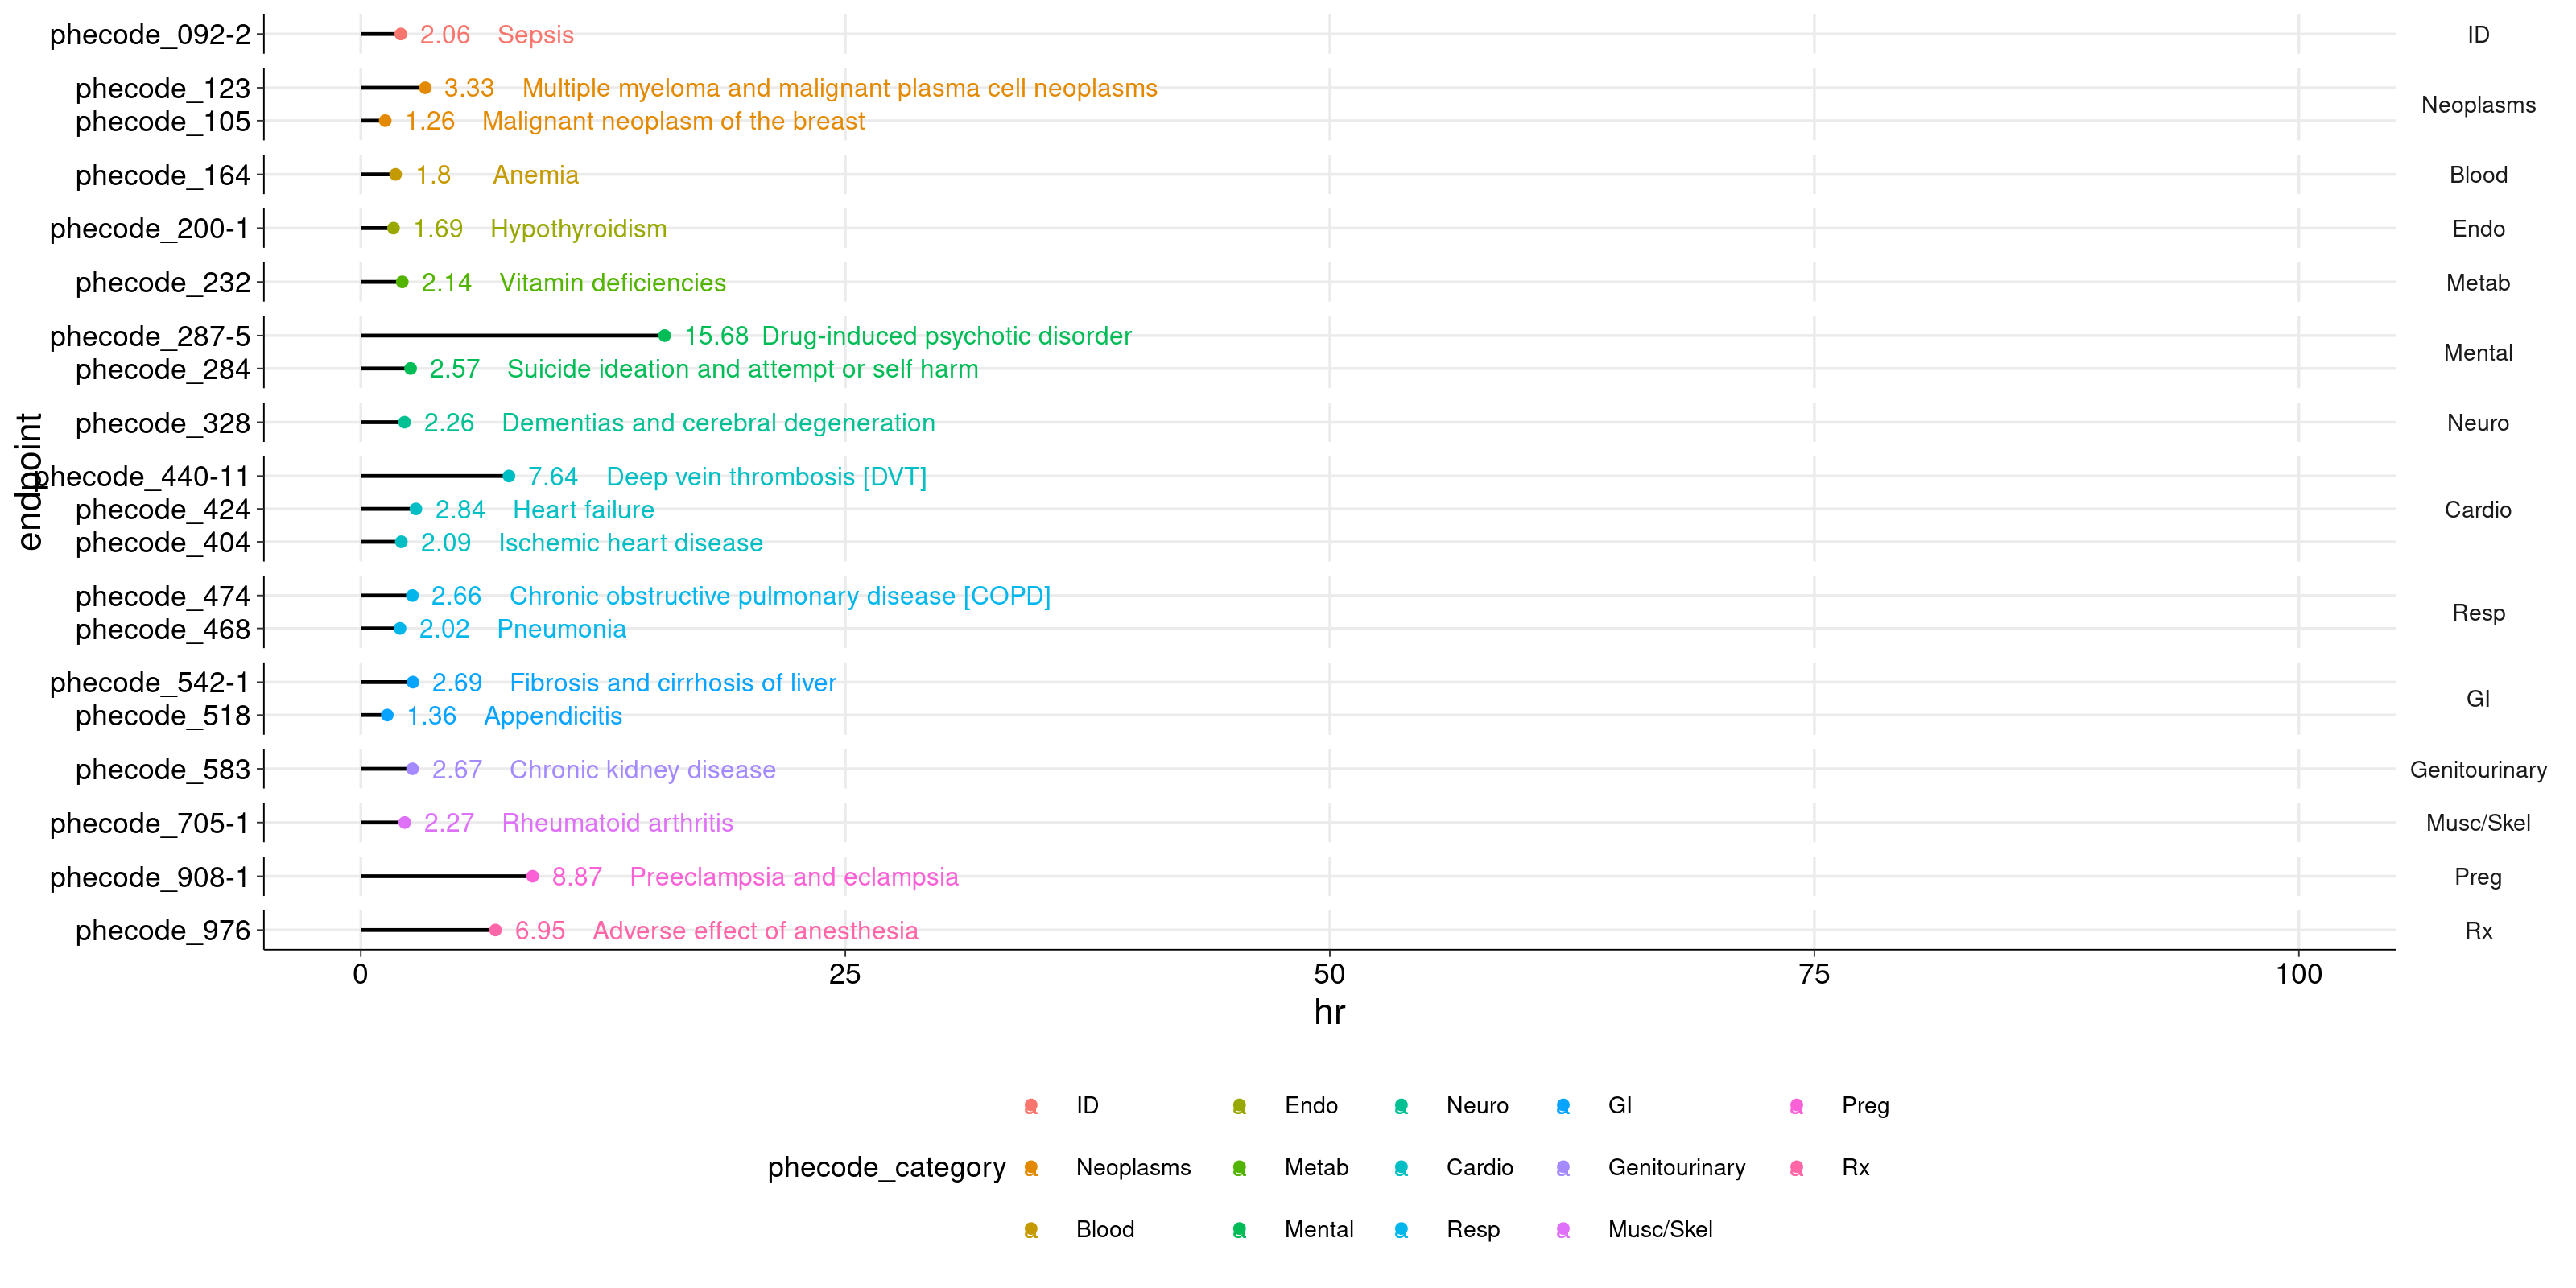

In [38]:
plot_width = 10; plot_height=5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

temp_hr %>% 
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    mutate(phecode_category = factor(phecode_category, levels=pcats_sorted)) %>%
    filter(endpoint %in% endpoint_selection) %>%
    ggplot(aes(x=endpoint, y=hr, color=phecode_category)) + 
    geom_segment(aes(x=endpoint, xend=endpoint, y=0, yend=hr), color="black")+
    geom_point(size=1) + 
    geom_text(aes(y=hr+1, label=round(hr, 2)), size=2.5, hjust=-0)+
    geom_text(aes(y=hr+5, label=phecode_string), size=2.5, hjust=0)+
    coord_flip(ylim=c(0, 100)) + 
    facet_grid(rows=vars(phecode_category), scales="free_y", space="free_y")+
    theme(strip.text.y = element_text(angle=0))#+ facet_wrap(~phecode_category, scales="free_x")

In [32]:
plot_width = 10; plot_height=75; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

temp_hr %>% 
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    mutate(phecode_category = factor(phecode_category, levels=pcats_sorted)) %>%
    filter(endpoint %in% endpoint_selection) %>%
    ggplot(aes(x=endpoint, y=hr, color=phecode_category)) + 
    geom_segment(aes(x=endpoint, xend=endpoint, y=0, yend=hr), color="black")+
    geom_point(size=1) + 
    geom_text(aes(y=hr+1, label=round(hr, 2)), size=2.5, hjust=-0)+
    geom_text(aes(y=hr+5, label=phecode_string), size=2.5, hjust=0)+
    coord_flip(ylim=c(0, 100)) + 
    facet_grid(rows=vars(phecode_category), scales="free_y", space="free_y")#+ facet_wrap(~phecode_category, scales="free_x")

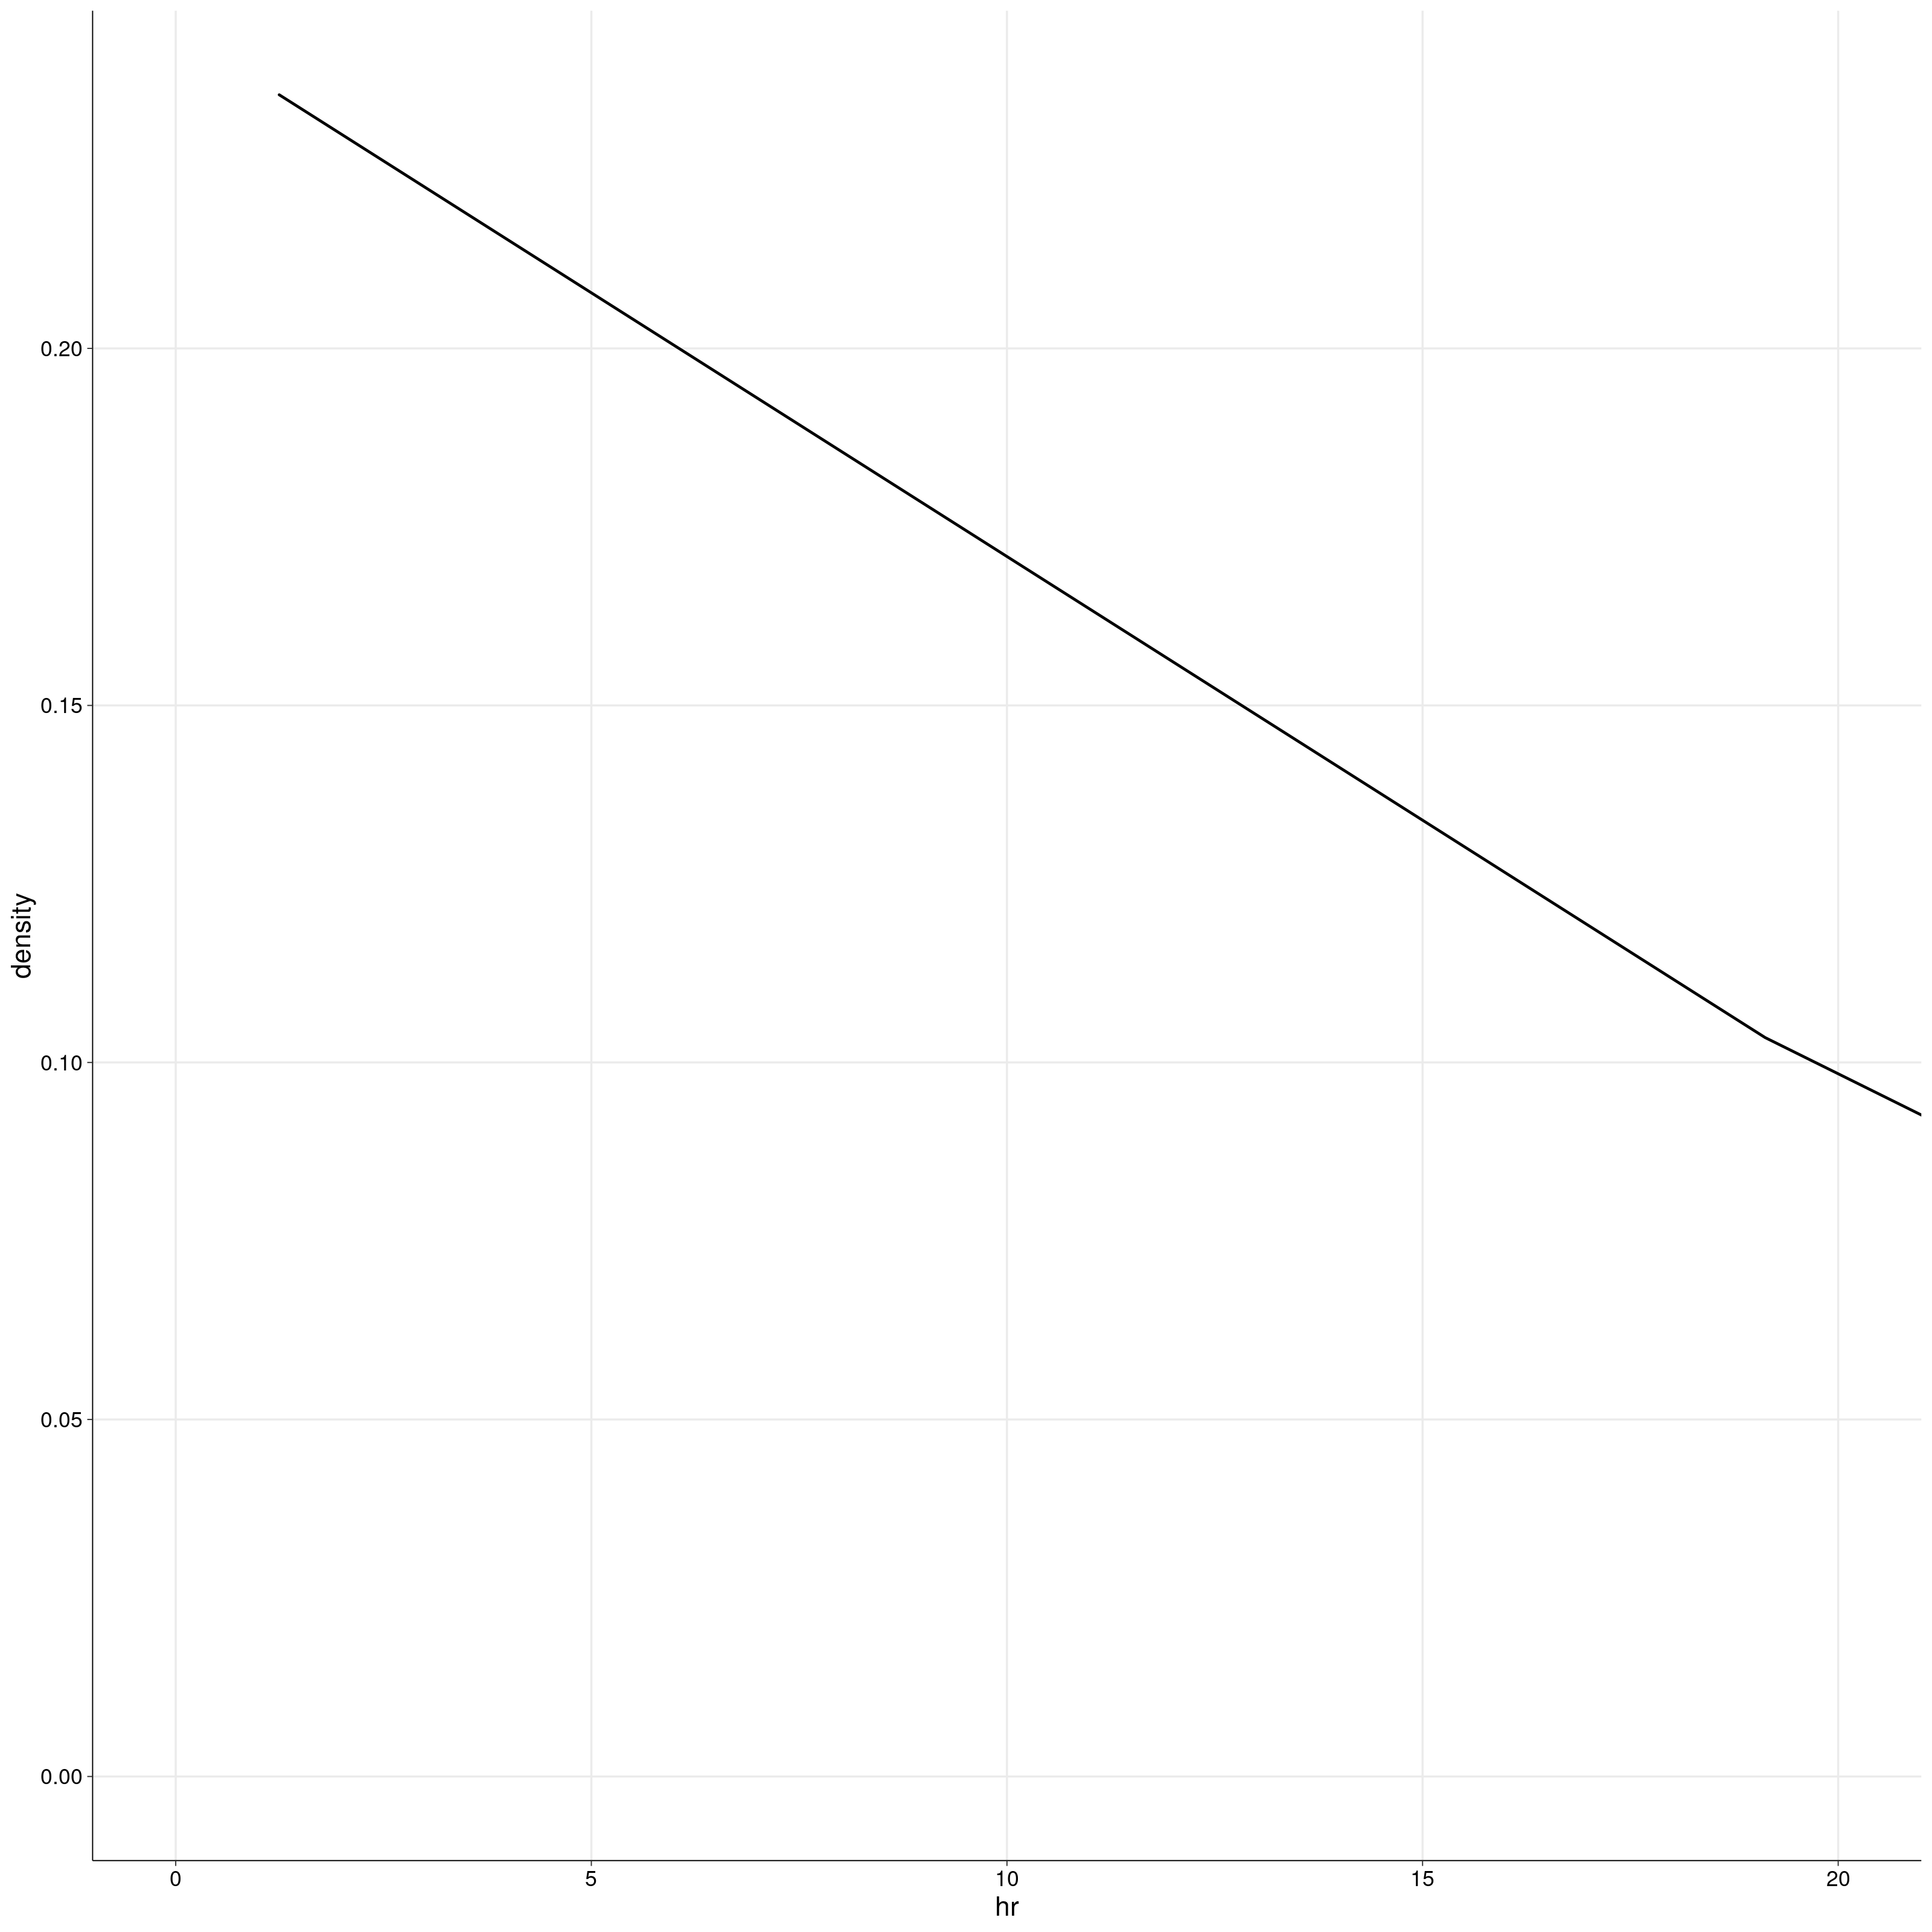

In [23]:
plot_width = 10; plot_height=10; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
temp_hr %>% 
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    mutate(phecode_category = factor(phecode_category, levels=pcats_sorted)) %>%
    ggplot(aes(x=hr)) + geom_density(bw=1) + coord_cartesian(xlim=c(0, 20))

In [21]:
endpoint_sample = (benchmark_endpoints %>% select(endpoint) %>% distinct() %>% sample_n(20))$endpoint

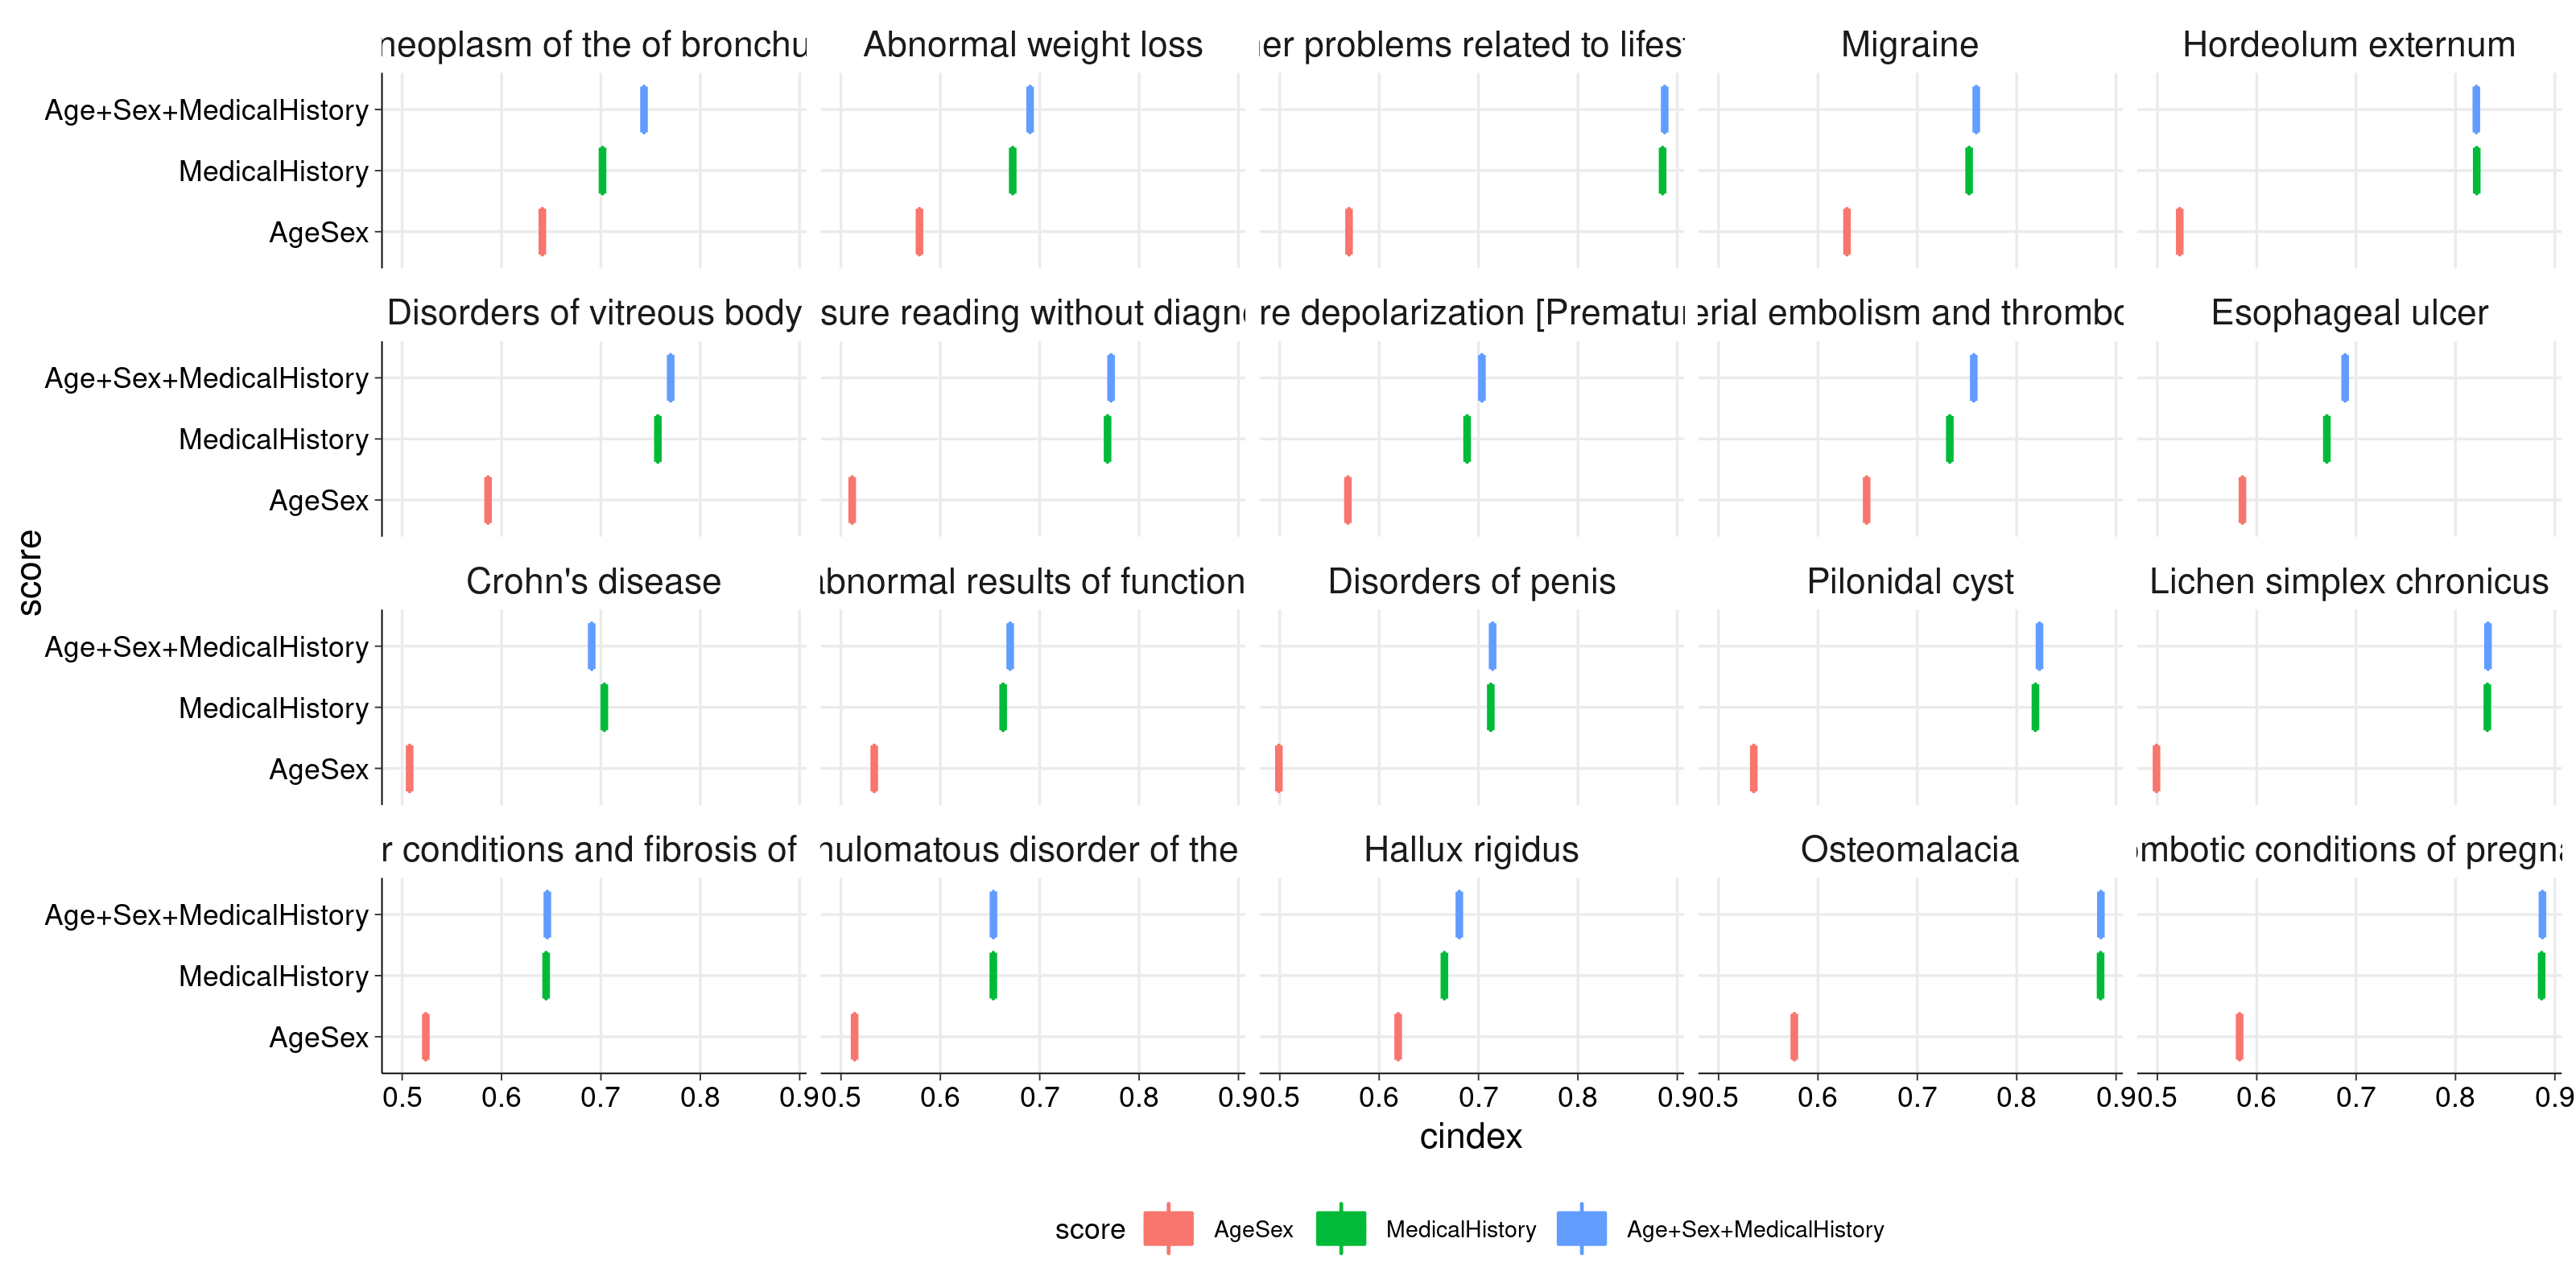

In [23]:
plot_width = 10; plot_height=5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

scores_plot = c("AgeSex", "Retina", "Age+Sex+Retina")#, "AgeSexRetina")

temp = benchmark_endpoints %>% filter(score %in% scores_plot) %>% mutate(score = factor(score, levels=scores_plot)) %>% filter(endpoint %in% endpoint_sample)
temp %>% 
    ggplot(aes(x=score, y=cindex, fill=score, color=score)) + 
    geom_boxplot()+
    coord_flip()+
    #geom_violin(alpha=0.5) + 
    facet_wrap(~endpoint, labeller=labeller(endpoint=endpoint_map))

endpoint,score,iteration,time,cindex,phecode,phecode_string,phecode_category,sex,ICD10_only,phecode_top,leaf
<glue>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
phecode_997,Age+Sex+MedicalHistory,0,10,0.7164782,997,Family history of other condition,Stat,Both,0,997,1
phecode_997,AgeSex,0,10,0.5988981,997,Family history of other condition,Stat,Both,0,997,1
phecode_997,AgeSexMedicalHistory,0,10,0.7130266,997,Family history of other condition,Stat,Both,0,997,1
phecode_997,MedicalHistory,0,10,0.7007227,997,Family history of other condition,Stat,Both,0,997,1
phecode_997,Age+Sex+MedicalHistory,1,10,0.7103757,997,Family history of other condition,Stat,Both,0,997,1
phecode_997,AgeSex,1,10,0.5972712,997,Family history of other condition,Stat,Both,0,997,1
phecode_997,AgeSexMedicalHistory,1,10,0.7058261,997,Family history of other condition,Stat,Both,0,997,1
phecode_997,MedicalHistory,1,10,0.6928414,997,Family history of other condition,Stat,Both,0,997,1
phecode_997,Age+Sex+MedicalHistory,2,10,0.7131720,997,Family history of other condition,Stat,Both,0,997,1
